In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# OPTIONAL: limit NVRAM Usage on GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [4]:
# Remove corrupt images
data_dir = 'data'
image_exts = ['jpeg', 'jpg']

for image_class in os.listdir(data_dir):
    
    try:

        for image in os.listdir(os.path.join(data_dir, image_class)):
            
            image_path = os.path.join(data_dir, image_class, image)

            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)

                if tip not in image_exts:
                    print(f'Image not in ext list {image_path}')
                    os.remove(image_path)

            except Exception as e:
                print(f'Issue with image {image_path}')
                os.remove(image_path)

    except NotADirectoryError:              # Checks wheter dir or .DS_Store
        pass

Corrupt JPEG data: 757 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


In [33]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [14]:
# Load data
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(480, 640))

Found 1630 files belonging to 2 classes.


In [21]:
# Inspect data

# Convert data into numpy iterator
data_iterator = data.as_numpy_iterator()

# Convert into batch
batch = data_iterator.next()

# Image 0 represented as numpy array
batch[0].shape

(32, 480, 640, 3)

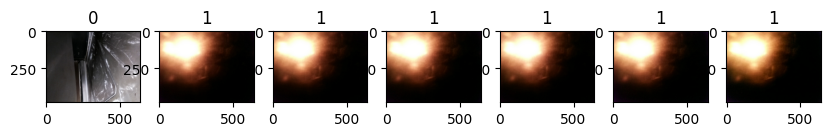

In [17]:
# Get another batch from iterator
batch = data_iterator.next()

# Check integer assigned to class
fig, ax = plt.subplots(ncols=7, figsize= (10, 10))

for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Class 0 = Printbed
# Class 2 = Oven Light

In [16]:
# Preprocess data

# Different options in documentation
# tf.data.Dataset
# .map allows accesing items in pipeline

# Scale data
# data = data.map(lambda x,y: (x/255, y))



In [30]:
# Number of batches
len(data)

51

In [31]:
# Split data
train_size = int(len(data) * 0.8)
test_size = int(len(data) * 0.1)
val_size = int(len(data) * 0.1) + 1     # adding one to achieve 51/51 # of batches

In [32]:
val_size + train_size + test_size


51

In [33]:
# Allocate training/validating/testing sizes
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)